In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
# Note, I suppress this future warning because Pandas is throwing a false positive. I've indicated where this warning was in the notebook below.
pd.set_option('mode.chained_assignment', None)

In [53]:
class XForce_Grapher():
    def __init__(self) -> None:
        self._data = None
        self._sources = None
        self._queries = None
        self._summary = None
        self.load("../../data/complete_db.csv")
        self.load_db_summary()
        return None

    def peek_data(self):
        return self._data.head()
    
    def get_data(self):
        return self._data

    def get_sources(self):
        return self._sources

    def get_queries(self):
        return self._queries
    
    def get_summary(self):
        return self._summary

    def set_data(self, path: str) -> None:
        self.load(path)
        return None

    def load(self, path: str) -> None:
        df = pd.read_csv(path)
        sources = list(set(df["source"].values.tolist()))
        sources.append("ALL")
        queries = list(set(df["query"].values.tolist()))

        self._data = df
        self._sources = sources
        self._queries = queries
        return None

    def graph_pub_freq(self, query: str, source: str="ALL") -> None:
        """
        Graphs the publishing frequency of papers in the database.

        query -> str
            The given search query to visualize

        source -> int
            The database source to restrict visualizations on
            arxiv: Graph only results from arxiv
            scopus: Graph only results from scopus
            ALL: Graphs all

        Returns -> None
            Prints out matplotlib graph of the published frequency
        
        Example
            grapher = XForce_Grapher()
            grapher.graph_pub_freq("radiation", "arxiv")
        """
        if source not in self._sources:
            print(f"{source} not found. Available options are {self._sources}, where 'ALL' analyzes from all sources.")
            return None

        df = self._data
        if source != "ALL":
            df = df[df["source"] == source]
        df = df[df["query"] == query]
        dates_extract = df["published"].apply(lambda x: x.split('T')[0])
        dates = [datetime(int(i.split("-")[0]), int(i.split("-")[1]), int(i.split("-")[2])) for i in dates_extract]
        
        plt.title(f"Source: {source}, Query: {query}")
        plt.suptitle(f"Publish Frequency within {len(dates)} Most Recent Papers")
        plt.xlabel("Publish Dates")
        plt.ylabel("Frequency")
        plt.grid("True")
        plt.xticks(rotation=45)
        plt.hist(dates, 25, alpha=.75)
        plt.show()
        return None

    def load_db_summary(self) -> None:
        """ 
        Generates the report table of the count of paper entries by query and by source and stores it in class attribute.

        Returns -> None
            Stores the report dataframe into class attribute.

        Example
            grapher = XForce_Grapher()
            grapher.load_db_summary()
        """
        df = self._data
        sources = self._sources
        queries = self._queries
        l = [["source"], queries]
        data_header = [item for sublist in l for item in sublist]
        data_rows = []
        for source in sources:
            data_row = [source]
            if source == "ALL":
                filtered_by_source_df = df
            else:
                filtered_by_source_df = df[df["source"] == source]
            for query in queries:
                filtered_by_query_df = filtered_by_source_df[filtered_by_source_df["query"] == query]
                data_row.append(len(filtered_by_query_df))
            data_rows.append(data_row)
        report = pd.DataFrame(data=data_rows, columns=data_header)
        self._summary = report
        return None
    
    def report_db_summary(self) -> None:
        """ 
        Prints a report table of the count of paper entries by query and by source.

        Returns -> None
            Both prints and returns the report dataframe.

        Example
            grapher = XForce_Grapher()
            grapher.report_db_summary()
        """
        print(self._summary)
        return None

    def graph_db_summary(self) -> None:
        """
        Graphs the report summary as a stacked barchart.

        Returns -> None
            Prints out matplotlib graph of the report summary
        
        Example
            grapher = XForce_Grapher()
            grapher.graph_db_summary()
        """
        df = self._summary
        extract_counts = df.T.values.tolist()[1:]
        extract_queries = df.T.index.tolist()[1:]
        sources = df["source"]

        query_count_data = {}
        for i in range(len(extract_counts)):
            query_count_data[extract_queries[i]] = extract_counts[i]
        
        width = 0.5
        fig, ax = plt.subplots()
        bottom = np.zeros(3)

        for query, count in query_count_data.items():
            p = ax.bar(sources, count, width, label=query, bottom=bottom)
            bottom += count

        plt.title(f"Distribution of Articles")
        plt.xlabel("Source")
        plt.ylabel("Counts")
        plt.grid("True")
        plt.legend(loc='upper left', bbox_to_anchor=(1,1))
        plt.show()

        return None

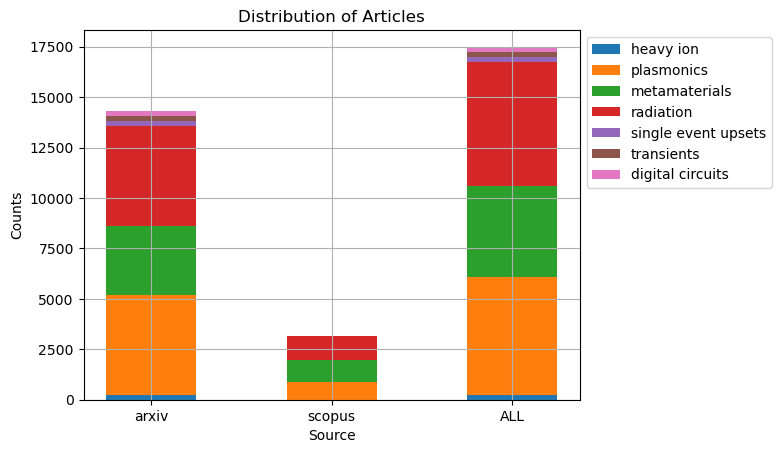

In [54]:
test = XForce_Grapher()
test.graph_db_summary()

In [44]:
test_df.T

,0,1,2
source,arxiv,scopus,ALL
heavy ion,238,0,238
plasmonics,4944,898,5842
metamaterials,3414,1084,4498
radiation,4994,1172,6166
single event upsets,243,0,243
transients,238,0,238
digital circuits,227,0,227


In [48]:
a = test_df.T.values.tolist()[1:]
b = test_df.T.index.tolist()[1:]
b

['heavy ion',
 'plasmonics',
 'metamaterials',
 'radiation',
 'single event upsets',
 'transients',
 'digital circuits']

In [50]:
a = test_df.T.values.tolist()[1:]
b = test_df.T.index.tolist()[1:]
counts = {}
for i in range(len(a)):
    counts[b[i]] = a[i]
width = 0.5
sources = test_df["source"]
fig, ax = plt.subplots()
bottom = np.zeros(3)

for query, count in counts.items():
    p = ax.bar(sources, count, width, label=query, bottom=bottom)
    bottom += count

plt.title(f"Distribution of Articles")
plt.xlabel("Source")
plt.ylabel("Counts")
plt.grid("True")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

{'heavy ion': [238, 0, 238],
 'plasmonics': [4944, 898, 5842],
 'metamaterials': [3414, 1084, 4498],
 'radiation': [4994, 1172, 6166],
 'single event upsets': [243, 0, 243],
 'transients': [238, 0, 238],
 'digital circuits': [227, 0, 227]}

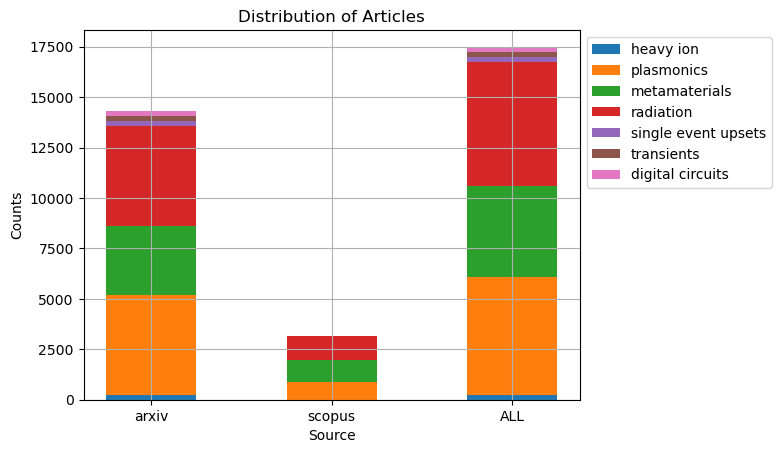

In [52]:
width = 0.5
sources = test_df["source"]
fig, ax = plt.subplots()
bottom = np.zeros(3)

for query, count in counts.items():
    p = ax.bar(sources, count, width, label=query, bottom=bottom)
    bottom += count

plt.title(f"Distribution of Articles")
plt.xlabel("Source")
plt.ylabel("Counts")
plt.grid("True")
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

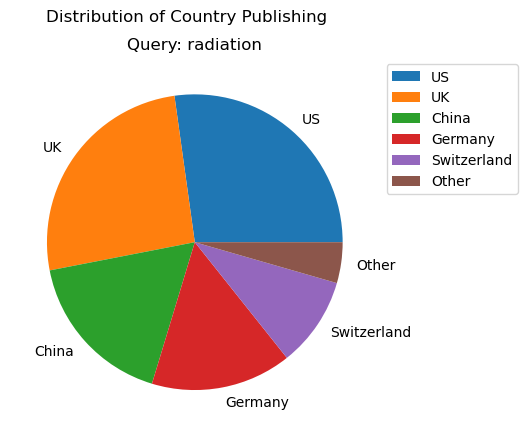

In [ ]:
countries = ["US", "UK", "China", "Germany", "Switzerland", "Other"]
plt.suptitle(f"Distribution of Country Publishing")
plt.title(f"Query: {df['query'][0]}")
plt.grid("True")
values = sorted(big_counts[0], reverse=True)
plt.pie(values, labels=countries)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()